In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import kabuki
%matplotlib inline
import hddm
print(hddm.__version__)

# For later convergence check
import multiprocessing as mp

0.8.0


/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


## Two condition HDDM (v : trial_type)
#### Load data and check data head
##### Use anxious.csv

In [2]:
# Load data from csv file into a NumPy structured array
dataAnx = hddm.load_csv('./rt_dataframes/anxious.csv')
dataAnx.head(10)
#check number of rows of data
#data.shape

,subjID,rt,win,trial_type,gain,loss,cert,gamble
0,ff1d7a9a28686c2b,2217.0,1.0,101,16.0,-5.0,0.0,1.0
1,ff1d7a9a28686c2b,1424.0,0.0,101,18.0,-6.0,0.0,1.0
2,ff1d7a9a28686c2b,1805.0,1.0,101,10.0,-5.0,0.0,1.0
3,ff1d7a9a28686c2b,1477.0,1.0,102,14.0,0.0,3.0,1.0
4,ff1d7a9a28686c2b,1257.0,1.0,102,12.0,0.0,4.0,1.0
5,ff1d7a9a28686c2b,1564.0,1.0,101,11.0,-5.0,0.0,1.0
6,ff1d7a9a28686c2b,1421.0,0.0,101,14.0,-4.0,0.0,1.0
7,ff1d7a9a28686c2b,1492.0,0.0,102,14.0,0.0,3.0,1.0
8,ff1d7a9a28686c2b,1196.0,0.0,102,20.0,0.0,7.0,0.0
9,ff1d7a9a28686c2b,1572.0,0.0,101,12.0,-5.0,0.0,1.0


## Prep the data
#### Changed the columns name allow hddm to pick up

In [3]:
dataAnx = dataAnx.rename(columns={'subjID'
: 
'subj_idx',
'gamble':
'response'})
dataAnx['rt'] = dataAnx['rt']/1000
dataAnx.head(10)

,subj_idx,rt,win,trial_type,gain,loss,cert,response
0,ff1d7a9a28686c2b,2.217,1.0,101,16.0,-5.0,0.0,1.0
1,ff1d7a9a28686c2b,1.424,0.0,101,18.0,-6.0,0.0,1.0
2,ff1d7a9a28686c2b,1.805,1.0,101,10.0,-5.0,0.0,1.0
3,ff1d7a9a28686c2b,1.477,1.0,102,14.0,0.0,3.0,1.0
4,ff1d7a9a28686c2b,1.257,1.0,102,12.0,0.0,4.0,1.0
5,ff1d7a9a28686c2b,1.564,1.0,101,11.0,-5.0,0.0,1.0
6,ff1d7a9a28686c2b,1.421,0.0,101,14.0,-4.0,0.0,1.0
7,ff1d7a9a28686c2b,1.492,0.0,102,14.0,0.0,3.0,1.0
8,ff1d7a9a28686c2b,1.196,0.0,102,20.0,0.0,7.0,0.0
9,ff1d7a9a28686c2b,1.572,0.0,101,12.0,-5.0,0.0,1.0


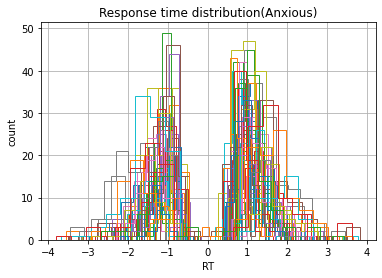

In [4]:
#flip the error RTs to be negative
dataAnx = hddm.utils.flip_errors(dataAnx)
#plt the RTs grouped by participants
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='Response time distribution(Anxious)')
for i, subj_data in dataAnx.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
# plt.savefig('./fitting_results/HDDM/HDDM2C(separate)/rt_distribution(anx).png')

## Fitting the hierarchical model for one condition with no subject effects for Anxious participants

In [5]:
m = hddm.HDDM(dataAnx,depends_on={'v': 'trial_type'}, include=('v', 'a', 'z', 't'))

m.find_starting_values()
m.sample(3000, burn=1000, dbname='./fitting_results/HDDM/HDDM2C(separate)/traces(2CAnx_v)', db='pickle')
m.save('./fitting_results/HDDM/HDDM2C(separate)/model(2CAnx_v)')

/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 3000 of 3000 complete in 951.0 sec

Plotting a
Plotting a_std
Plotting v(101)
Plotting v(102)
Plotting v_std
Plotting t
Plotting t_std
Plotting z
Plotting z_std


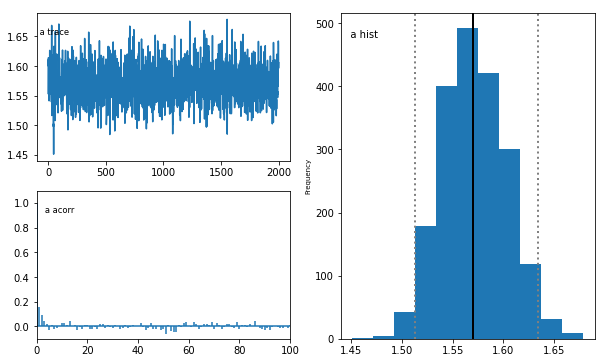

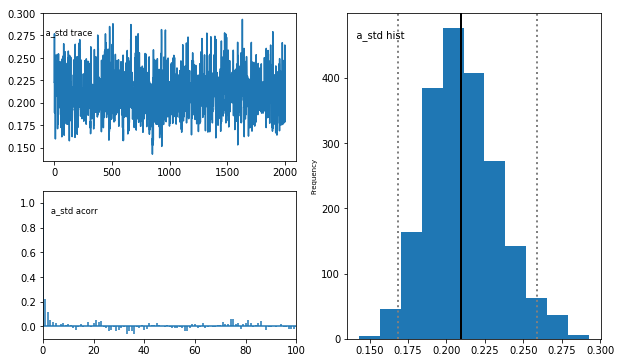

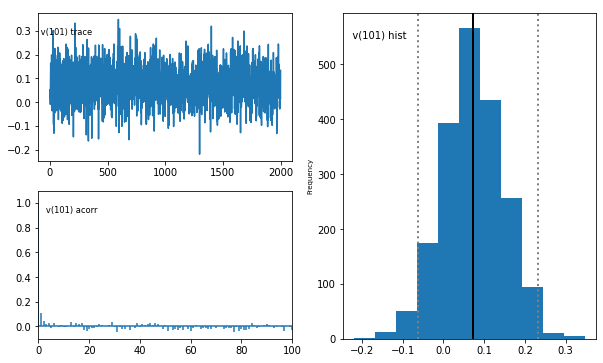

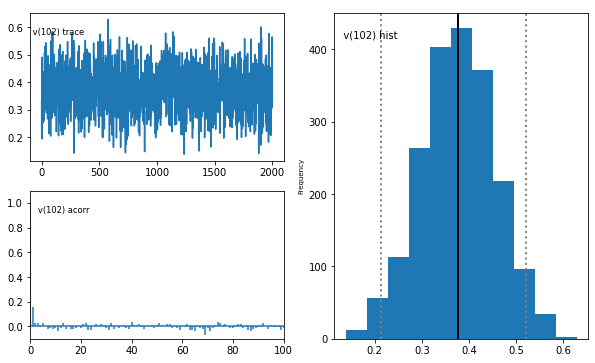

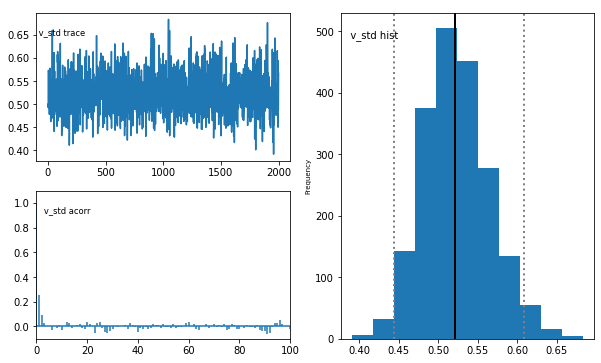

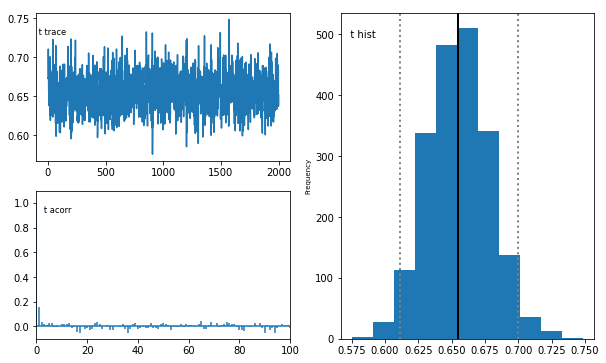

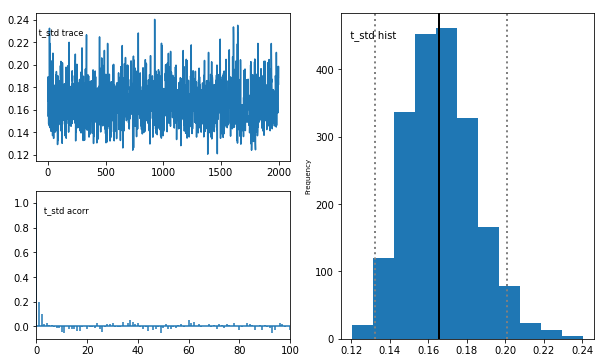

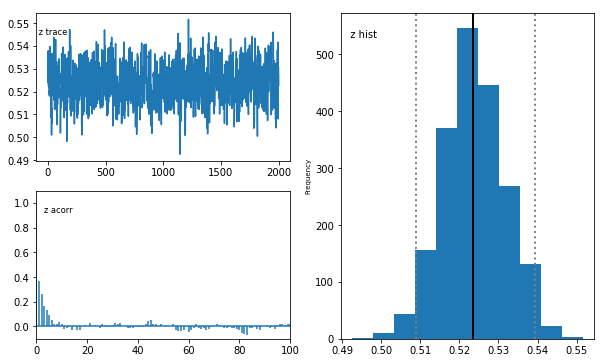

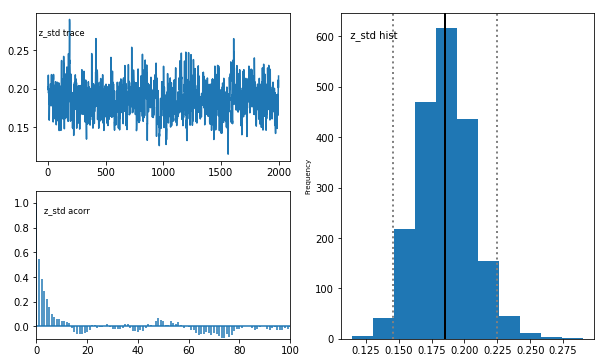

In [6]:
# plot posteriors
m.plot_posteriors(['a', 't', 'v', 'a_std', 'v_std','z', 'z_std','t_std'])

In [7]:
stats2Cv = m.gen_stats()
stats2Cv.to_csv('./fitting_results/HDDM/HDDM2C(separate)/HDDM2CAnx_v.csv', sep=',')
stats2Cv[stats2Cv.index.isin(['a', 'a_std', 'v', 'v_std', 't', 't_std', 'z', 'z_std'])]

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,1.57164,0.0316329,1.51358,1.54933,1.57051,1.59362,1.63542,0.000904042
a_std,0.211026,0.0232025,0.170268,0.194248,0.209147,0.225307,0.261402,0.000704415
v_std,0.523477,0.041604,0.447173,0.495215,0.521495,0.549665,0.612318,0.00120543
t,0.655344,0.02317,0.611726,0.639451,0.655121,0.670956,0.700722,0.000650595
t_std,0.166951,0.0179447,0.135766,0.15422,0.165756,0.178507,0.204916,0.00050778
z,0.523729,0.00791762,0.508157,0.51839,0.523575,0.529111,0.53906,0.000302977
z_std,0.185672,0.0210095,0.147537,0.17134,0.185069,0.199062,0.229084,0.000974385


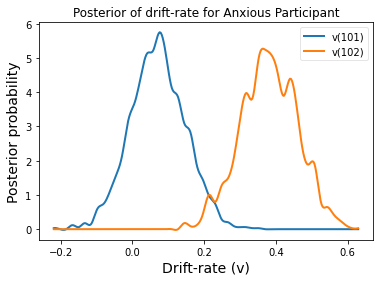

In [8]:
v_101, v_102 = m.nodes_db.node[['v(101)', 'v(102)']]
hddm.analyze.plot_posterior_nodes([v_101, v_102])
plt.xlabel('Drift-rate (v)', fontsize=14)
plt.ylabel('Posterior probability', fontsize=14)
plt.title('Posterior of drift-rate for Anxious Participant', fontsize=12)
plt.savefig('./fitting_results/HDDM/HDDM2C(separate)/posterior_vAnx(101,102).png')

In [9]:
m.dic

15183.912738435096

## Check for model convergence

In [10]:
# Set up models list to append results
models2CvAnx = list()

In [11]:
def fit_hddm_chain(data, chain_num):
    print(f'Fitting chain {chain_num}')
    m = hddm.HDDM(data,include=('v', 'a', 'z', 't'))
    m.find_starting_values()
    m.sample(3000, burn=1000, dbname = f'./fitting_results/HDDM/HDDM2C(separate)/chain2Cv_{chain_num}', db='pickle')
    m.save(f'./fitting_results/HDDM/HDDM2C(separate)/chain2CvANX_{chain_num}')
    print(f'Finished chain {chain_num}')
    return m

In [12]:
num_chains = 5
data_chains = [(dataAnx,chain_num) for chain_num in range(num_chains)]

with mp.Pool(processes=num_chains) as pool:
    models2CvAnx = pool.starmap(fit_hddm_chain, data_chains)
print('Finished all chains')

Fitting chain 4
Fitting chain 3Fitting chain 2

Fitting chain 0
Fitting chain 1


/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 -----------------87%-------------     ] 2635 of 3000 complete in 884.9 sec                0%                  ] 3 of 3000 complete in 0.6 sec[                  0%                  ] 3 of 3000 complete in 0.6 sec[                  0%                  ] 3 of 3000 complete in 0.6 sec[                  0%                  ] 5 of 3000 complete in 1.2 sec[                  0%                  ] 5 of 3000 complete in 1.2 sec[                  0%                  ] 5 of 3000 complete in 1.2 sec[                  0%                  ] 5 of 3000 complete in 1.3 sec[                  0%                  ] 5 of 3000 complete in 1.2 sec[                  0%                  ] 7 of 3000 complete in 1.9 sec[                  0%                  ] 7 of 3000 complete in 1.9 sec  [                  0%                  ] 7 of 3000 complete in 2.0 sec[                  0%                  ] 7 of 3000 complete in 1.8 sec[                  0%                  ] 7 of 3000 complete in 2.0 sec[               

In [13]:
models2CvAnx

In [14]:
results = hddm.analyze.gelman_rubin(models2CvAnx)
for key, value in results.items():
    print(f"{key}: {value}")

a: 1.0000097035764715
a_std: 1.0000226694741325
a_subj.00aa64fdcb675341: 1.0005317630478558
a_subj.06c46b112368babf: 1.0004015080714528
a_subj.0beac20378edac7b: 1.0007179648831743
a_subj.10d15198ac61a404: 1.0004591404696626
a_subj.12a096342c4d052f: 0.9999438158141745
a_subj.13e347e32a454872: 0.9999197770713908
a_subj.1ffdcfc59b83c43a: 1.000396932460564
a_subj.221e9f16c114b2c0: 1.0005683985438647
a_subj.2737c4b829b3018f: 1.0000537797252396
a_subj.279cd1540fc8f71f: 1.0001225177484157
a_subj.2a531595d6ab08c8: 1.000083074548396
a_subj.2adc46a1bfc70679: 1.0003137876768675
a_subj.322d6276c00056e7: 1.0002574733409009
a_subj.46099f8b742520b0: 1.0010401324902292
a_subj.49c4e664cf02d362: 1.0004820388535065
a_subj.4a6bf10e80304920: 0.9999091272136932
a_subj.4dee88b397c3bbf4: 1.0006297058541183
a_subj.52abc657a668b04e: 0.9999755546883466
a_subj.5696a26f6b865ccb: 1.0002521925932935
a_subj.61dce9b56e969395: 0.9999300208359575
a_subj.6246f3d78ae6b481: 1.0004535922628683
a_subj.6ac61d4f76c3add5: 1.000

In [15]:
bigger_than_threshold = {}
smaller_than_threshold = {}
for key, value in results.items():
    if value > 1.1:
        bigger_than_threshold[key] = value
    elif value < 0.9:
        smaller_than_threshold[key] = value
print("Values bigger than the threshold:")
print(bigger_than_threshold)

print("\nValues smaller than the threshold:")
print(smaller_than_threshold)

Values bigger than the threshold:
{}

Values smaller than the threshold:
{}


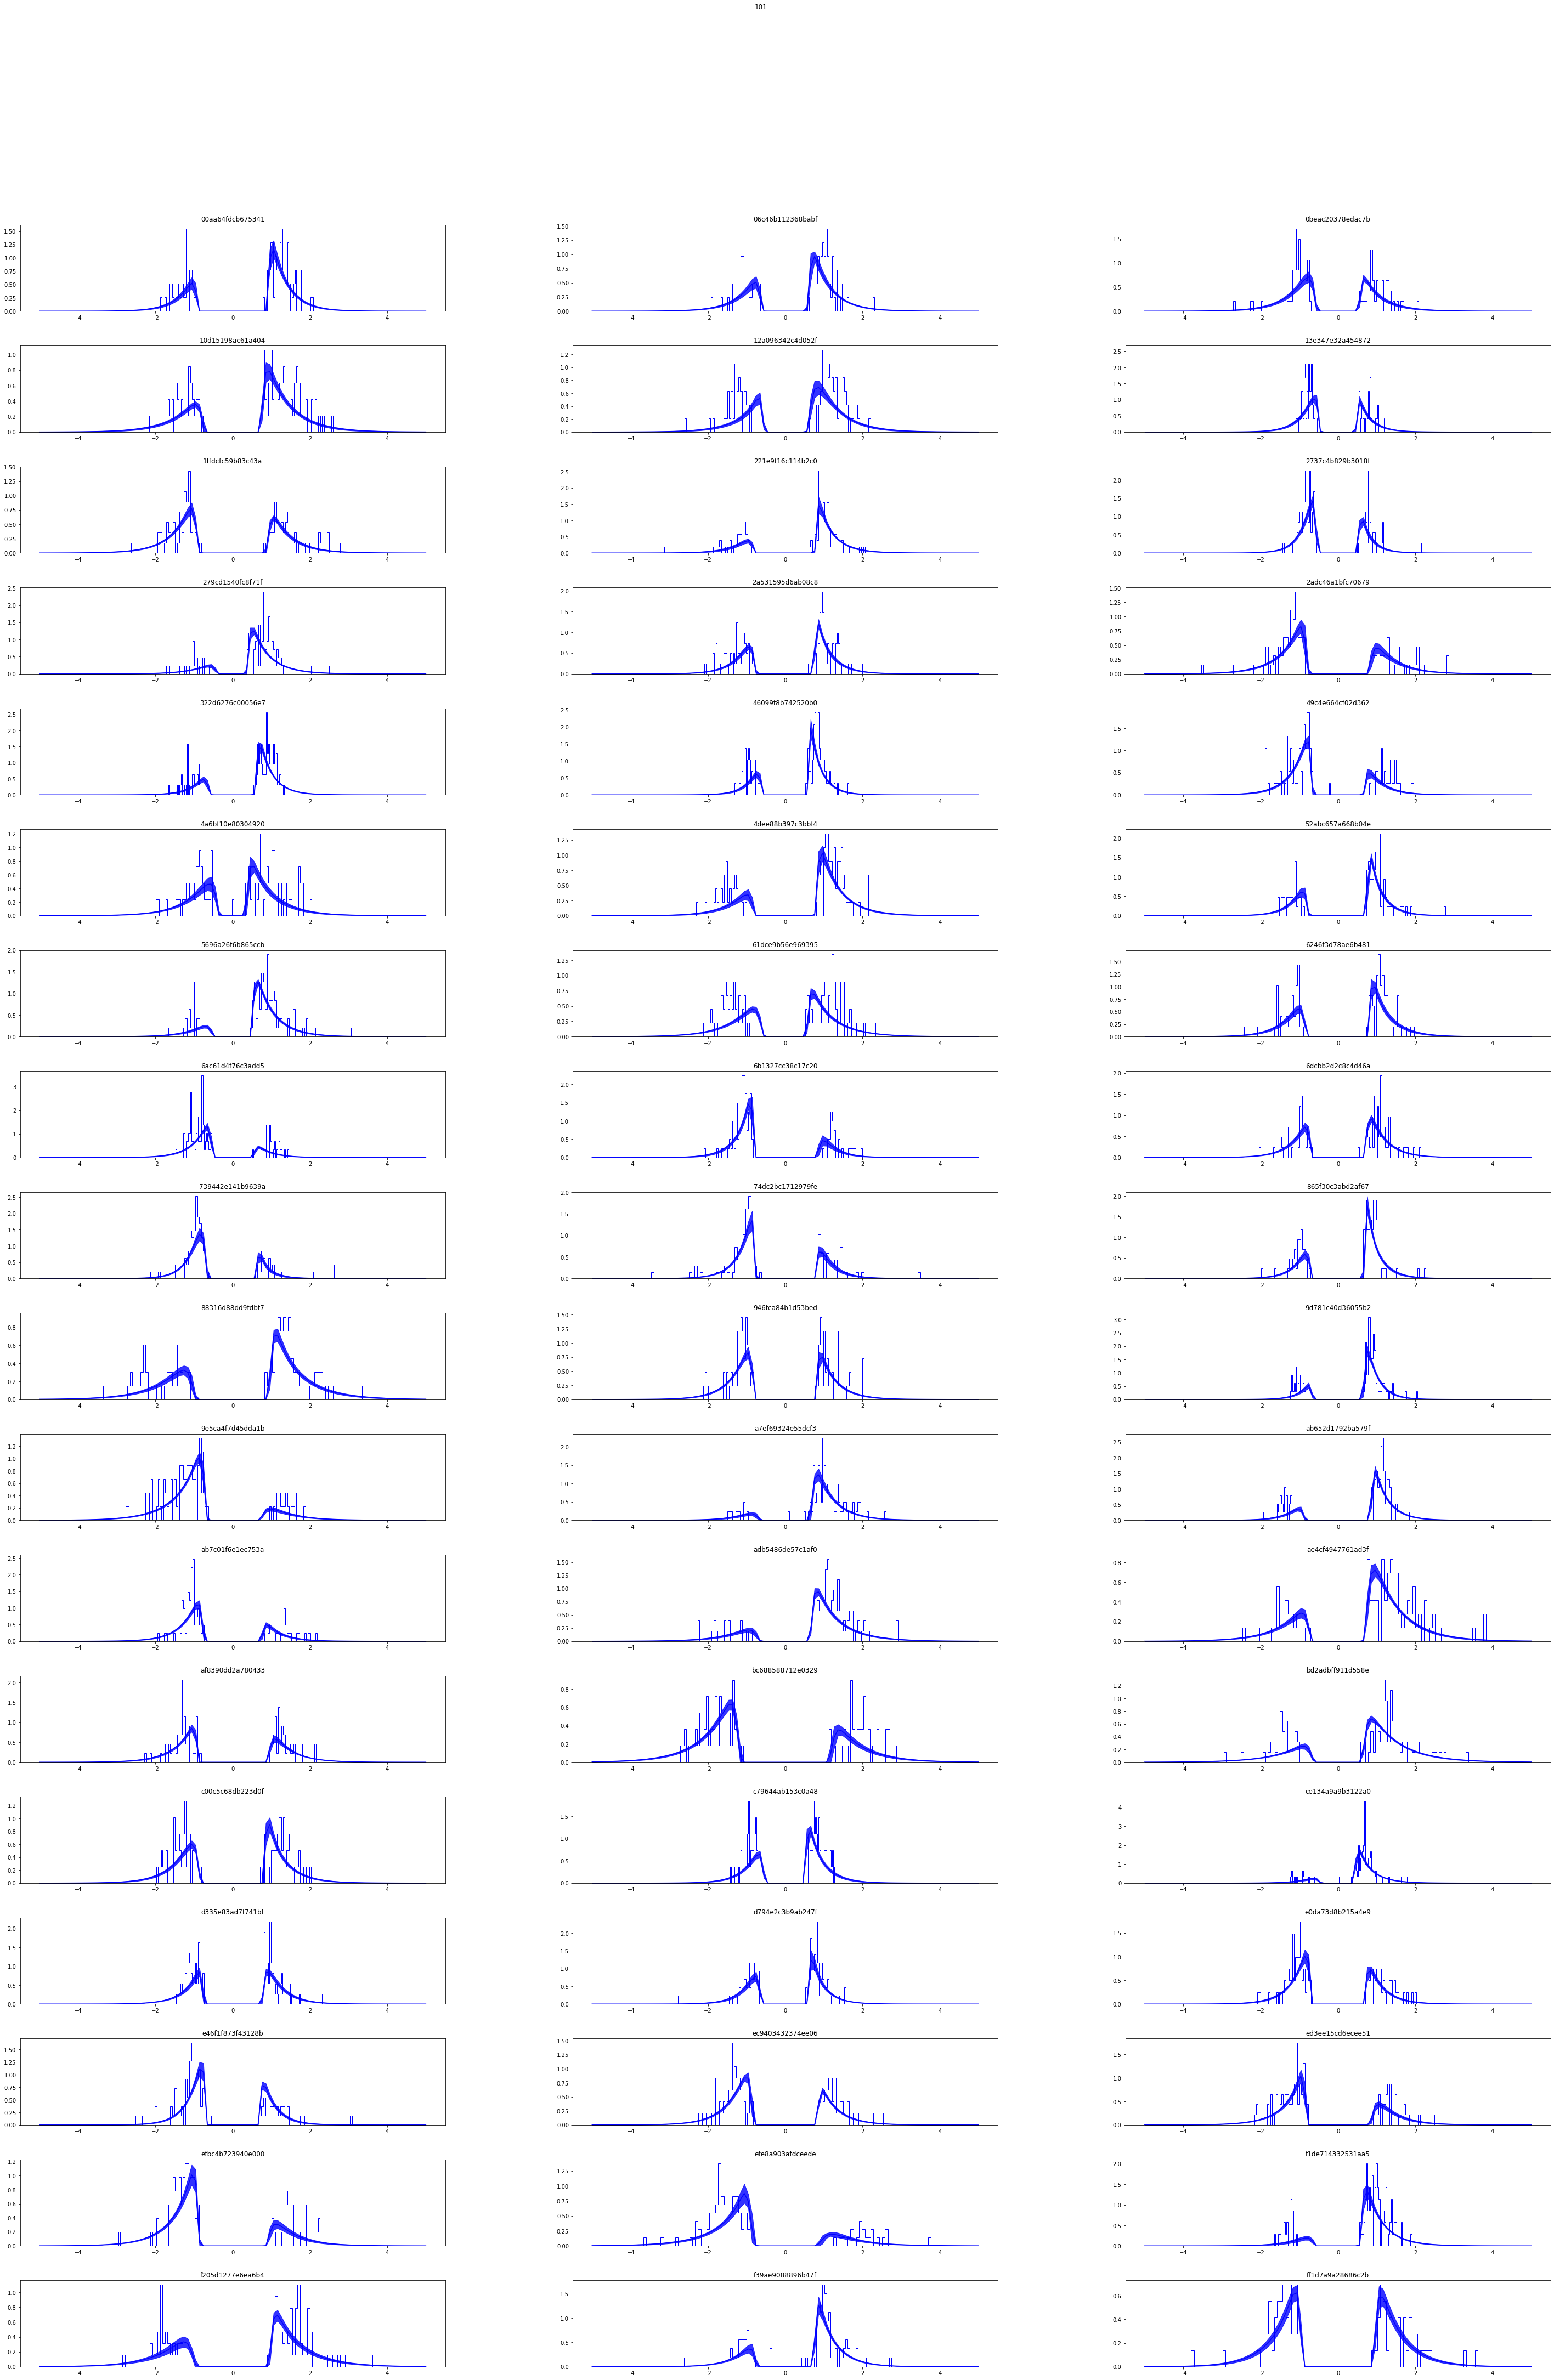

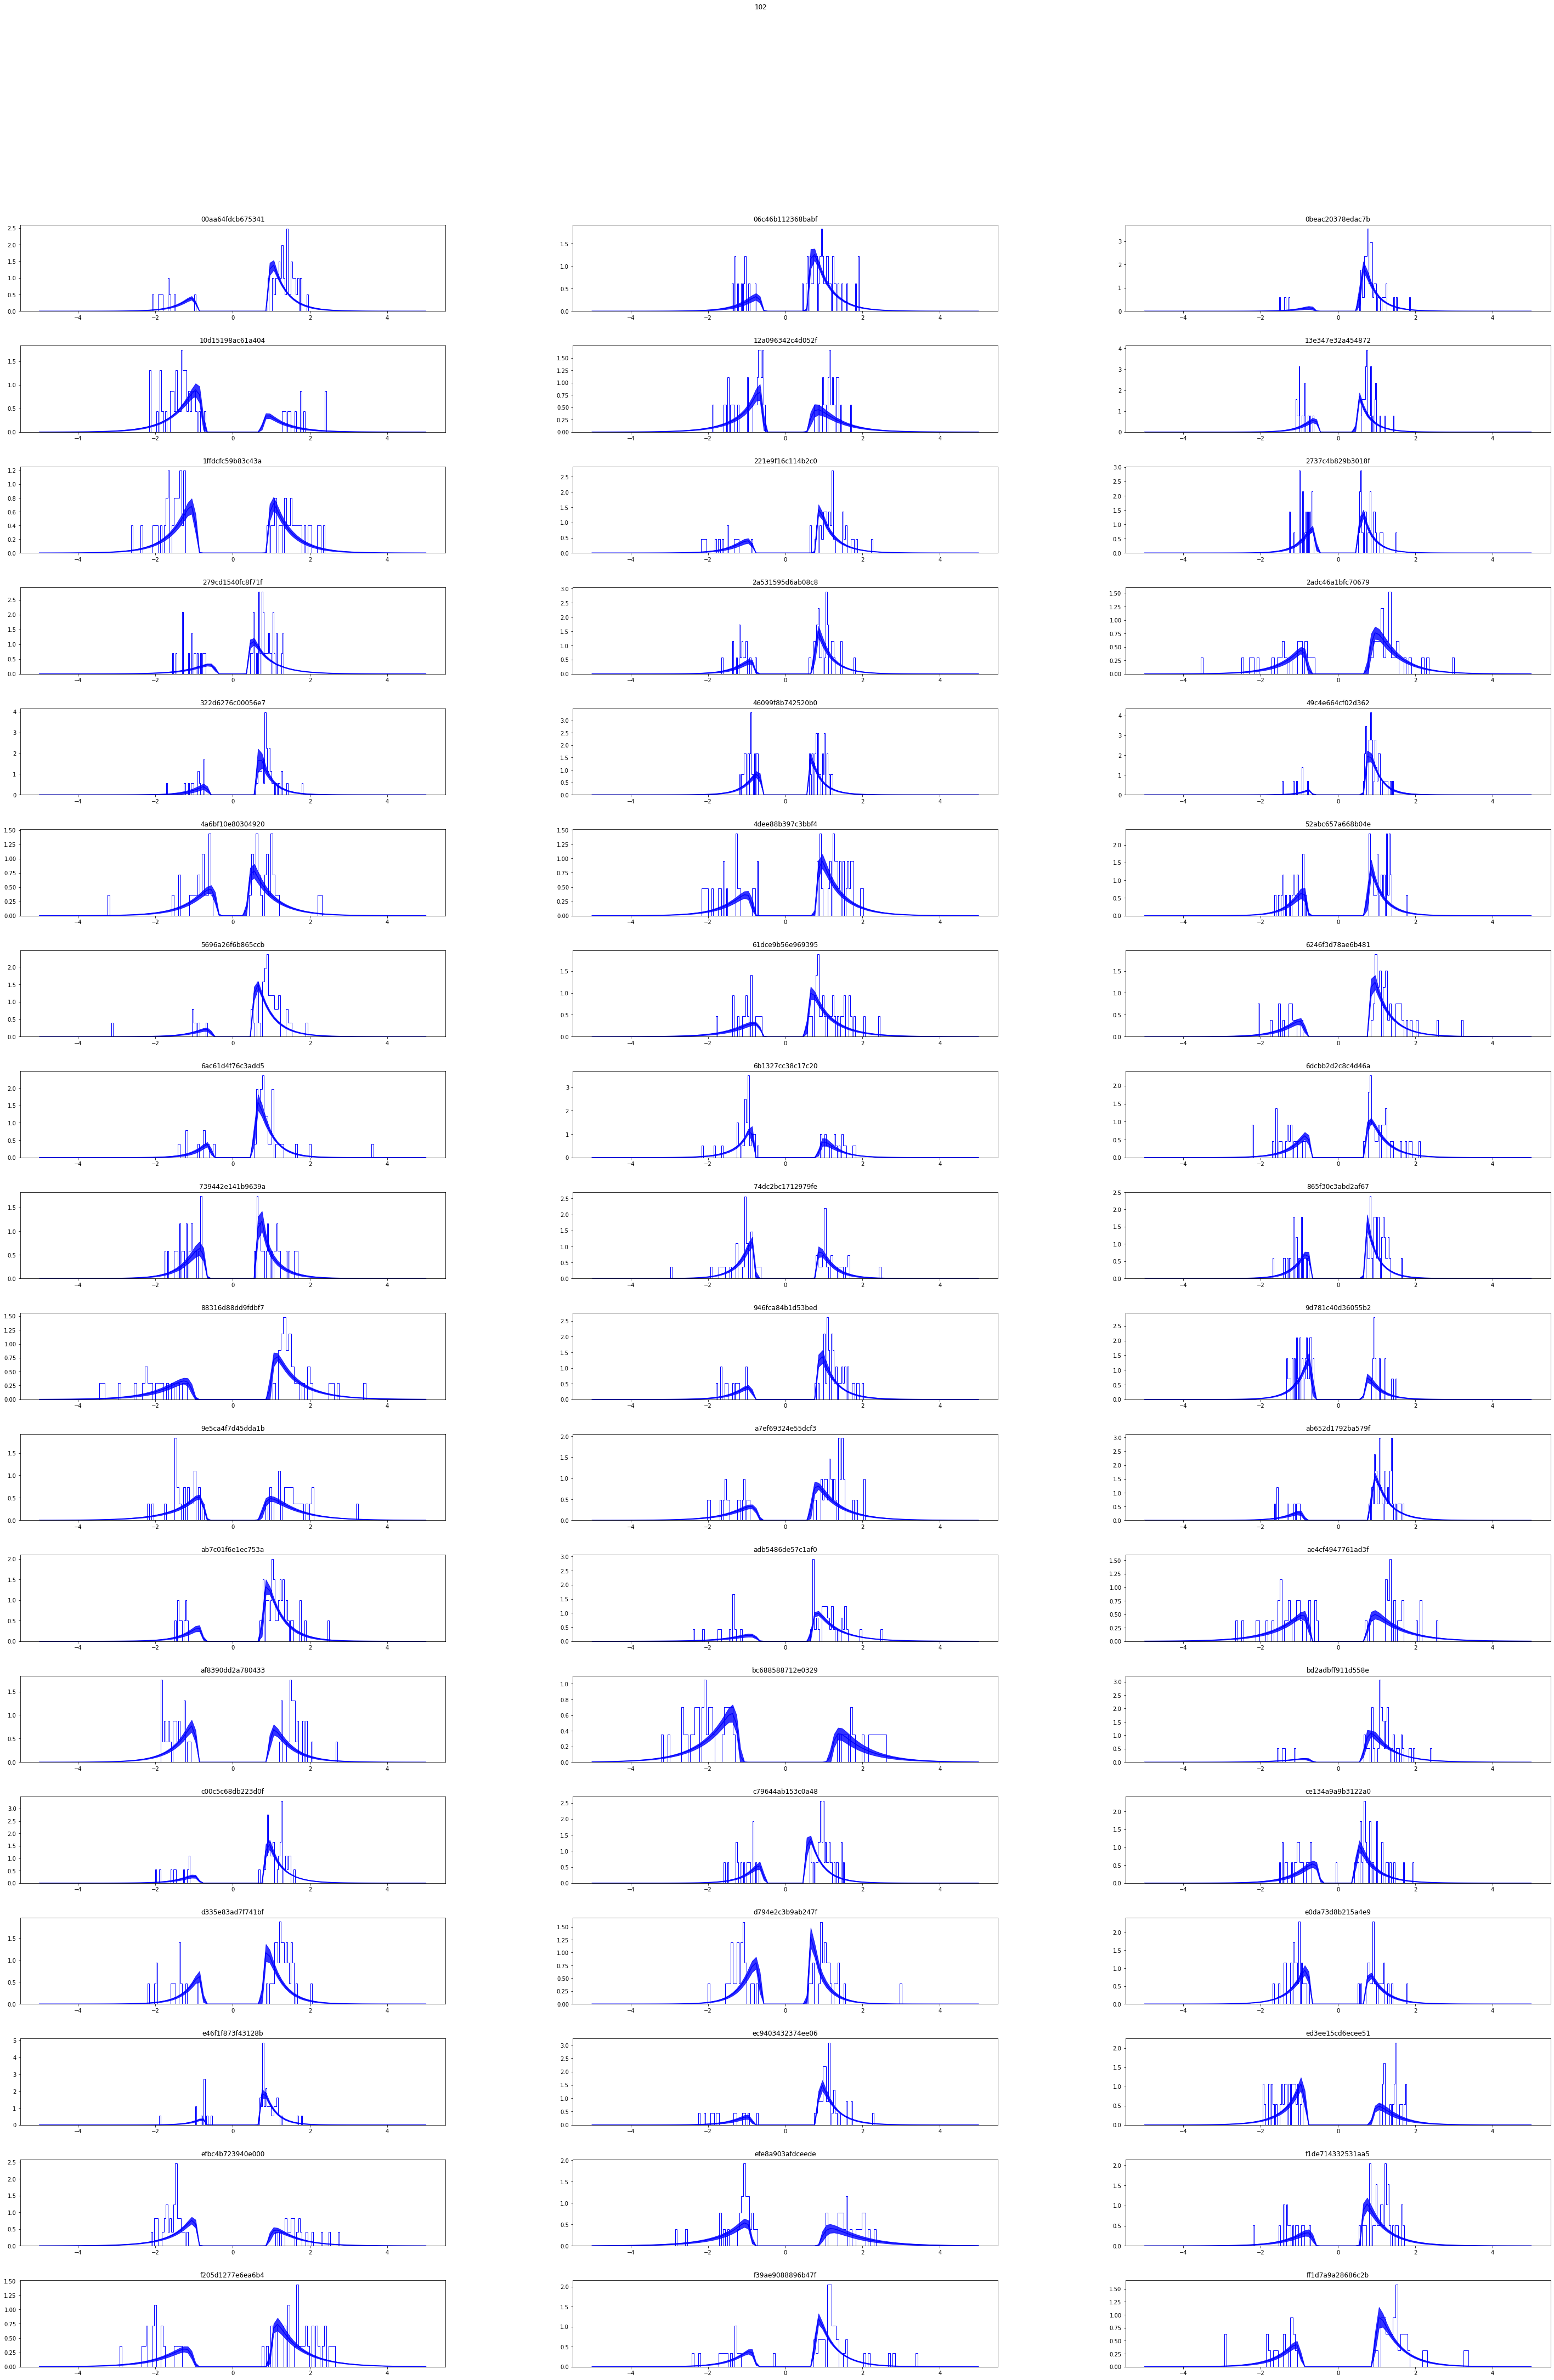

In [16]:
m.plot_posterior_predictive(figsize=(50, 70))